## Background selection SELF
You are given 2D "signal" and 2D "signal + background". You need to:
1. Construct a generative model
2. Plot the definetely identified background (p_background > 0.9) 
3. Plot likelihood histogram for signal candidates (p_background < 0.9)

In case your model runs too slow, feel free to use a subsample.

In [43]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [76]:
signal = np.load("../../day_1/basic_seminars/signal.npy")
mix = np.load("../../day_1/basic_seminars/mix.npy")
small_signal = signal[0:1000]
small_mix = mix[0:1000]
#print small_signal
#print small_mix

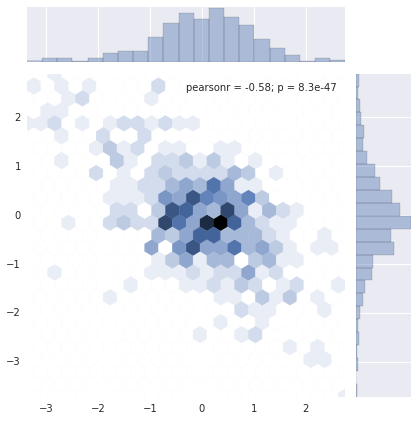

In [60]:
sns.jointplot(small_signal[:, 0], small_signal[:, 1], kind='hex');

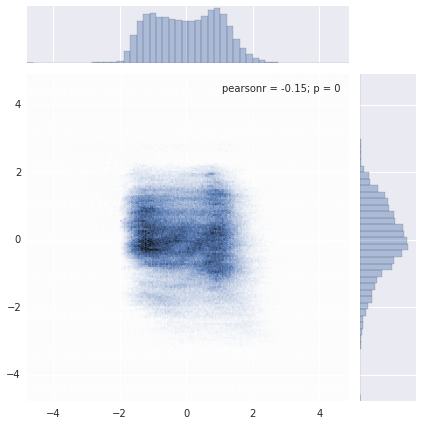

In [10]:
sns.jointplot(mix[:, 0], mix[:, 1], kind='hex');

In [51]:
mix

array([[-0.84859126,  1.3532826 ],
       [-0.42431849,  0.40096048],
       [ 0.35455765, -0.10448028],
       ..., 
       [-0.60283572, -0.49524033],
       [-0.71333185, -1.50691948],
       [ 0.48619715, -0.88841475]])

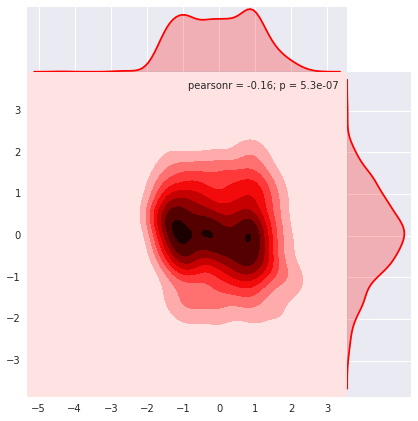

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from itertools import izip
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GMM
#print signal[:,0]
clf_x = GMM(1,n_iter=50, random_state=3, n_init=10).fit(small_signal[:,0, np.newaxis])
signal_pdf_x = np.linspace(-5, 5, 1000)[:, np.newaxis]
density_x = np.exp(clf_x.score(signal_pdf_x))
clf_y= GMM(1,n_iter=50, random_state=3, n_init=10).fit(small_signal[:,1,np.newaxis])
signal_pdf_y = np.linspace(-5, 5, 1000)[:, np.newaxis]
density_y = np.exp(clf_y.score(signal_pdf_y))
#plt.hist(small_signal[:,1], 80, normed=True, alpha=0.5)
#plt.plot(signal_pdf_x, density_x, '-r')
#plt.plot(signal_pdf_y, density_y, '-r')
#plt.xlim(-5,5)
#sns.jointplot(density_x,density_y, kind='hex');
sns.jointplot(small_signal[:,0],small_signal[:,1],kind="kde", space=0, color="r")
#sns.jointplot(small_mix[:,0],small_mix[:,1],kind="kde", space=0, color="r")

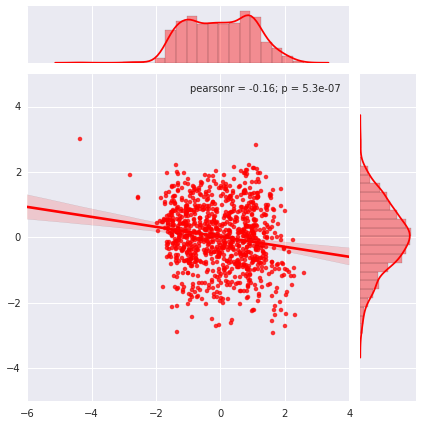

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from itertools import izip
from sklearn.neighbors import KernelDensity
##kernel density attempt:
##kde = KernelDensity(0.4).fit(signal)
##plt.plot(signal, kde.score_samples(signal), '-', label='KDE') #strani plot verdi e blu
#
#
# Gaussian attempt /?
#
from sklearn.mixture import GMM
#print signal[:,0]
clf_x = GMM(1,n_iter=500, random_state=3, n_init=10).fit(small_signal[:,0, np.newaxis])
signal_pdf_x = np.linspace(-10, 20, 1000)[:, np.newaxis]
density_x = np.exp(clf_x.score(signal_pdf_x))
clf_y= GMM(1,n_iter=500, random_state=3, n_init=10).fit(small_signal[:,1,np.newaxis])
signal_pdf_y = np.linspace(-10, 20, 1000)[:, np.newaxis]
density_y = np.exp(clf_y.score(signal_pdf_y))
#
#plt.hist(signal[:,0], 80, normed=True, alpha=0.5)
#plt.plot(signal_pdf_x, density_x, '-r')
#plt.xlim(-5,5)
import seaborn as sns
%matplotlib inline
#sns.jointplot(density_x, density_y, kind='hex');
#sns.jointplot(small_signal[:,0], small_signal[:,1], kind="reg")
sns.jointplot(small_mix[:,0], small_mix[:,1], kind="reg", color ='r')



In [ ]:
plt.plot(signal_pdf_x, 50, normed=True, alpha=0.5)

In [21]:
kde

KernelDensity(algorithm='auto', atol=0, bandwidth=0.4, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)